# Pandas Lab Assignment - Diamonds

The following csv data file contains data of diamonds with following characteristics.

carat - diamond's apparent size <br>
cut - how good the diamond shaping is <br>
color - colour of a diamond as letter representation <br>
clarity - clarity of diamond <br>
depth - depth of diamond <br>
table - top surface of diamond <br>
price - price of diamond <br>
x - x dimension <br>
y - y dimension<br>
z - z dimension <br>

Read the file and find the following:

1. Drop the unnamed column from the dataset once you read it  
2. The occurences of all unique colors of diamonds, bar chart of the same.     
3. Average price of each cut of diamond.  
4. Find the volume of every diamond and store it in a new column in the dataset. (volume = x*y*z)   
5. Histograms of Price and depths colums as two separate plots  
6. A scatter plot of carat vs Price, volume vs Price, depth vs Price in a subplot of 1x3.  
7. Convert the categorical values of color, to numbers. i.e D, E, F, H, I, J to 0, 1, 2, 3, 4, 5 using Pandas methods only  
8. Which clarity(i.e the category) diamond has maximum mean depth?  
9. Find the diamond(i.e row) with minimum price per volume

In [1]:
import pandas as pd
df = pd.read_csv("./data/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
newdata1 =df.drop(['Unnamed: 0'],axis=1)

In [3]:
newdata1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [5]:
hy=df['color'].value_counts()
print(hy)
hy.plot(kind='bar')

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


In [6]:
newdata1['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [7]:
datapricecut=newdata1[['cut','price']]
datapricecut.head()

,cut,price
0,Ideal,326
1,Premium,326
2,Good,327
3,Premium,334
4,Good,335


In [8]:
for name,values in datapricecut.groupby(['cut']):
    print(name,values['price'].mean())

Fair 4358.757763975155
Good 3928.864451691806
Ideal 3457.541970210199
Premium 4584.2577042999055
Very Good 3981.7598907465654


In [9]:
newdata2=newdata1[['x','y','z']]
newdata2.head()

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
2,4.05,4.07,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75


In [10]:
newdata1['volume']=newdata1['x']*newdata1['y']*newdata1['z']
newdata1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


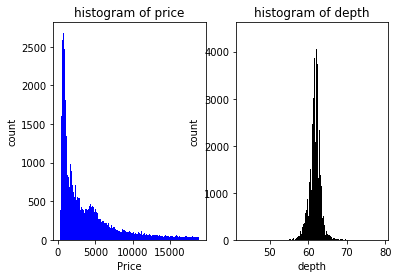

In [11]:
import matplotlib.pyplot as mt
mt.subplot(1,2,1)
mt.hist(newdata1['price'],bins=200,color='b')
mt.xlabel('Price')
mt.ylabel('count')
mt.title('histogram of price')
mt.subplot(1,2,2)
mt.hist(newdata1['depth'],bins=200,color='k')
mt.xlabel('depth')
mt.ylabel('count')
mt.title('histogram of depth')
mt.show()

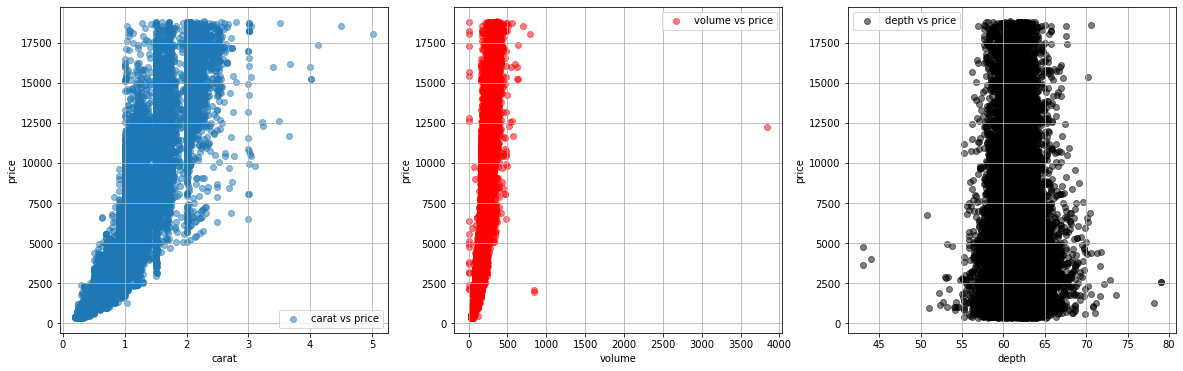

In [12]:
mt.figure(figsize=[20,6])
mt.subplot(1,3,1)
mt.scatter(newdata1['carat'],newdata1['price'],alpha=0.5,label='carat vs price')
mt.xlabel('carat')
mt.ylabel('price')
mt.legend()
mt.grid()
mt.subplot(1,3,2)
mt.scatter(newdata1['volume'],newdata1['price'],color='r',alpha=0.5,label='volume vs price')
mt.xlabel('volume')
mt.ylabel('price')
mt.legend()
mt.grid()
mt.subplot(1,3,3)
mt.scatter(newdata1['depth'],newdata1['price'],color='k',alpha=0.5,label='depth vs price')
mt.xlabel('depth')
mt.ylabel('price')
mt.legend()
mt.grid()
mt.show()

- Convert the categorical values of color, to numbers. i.e D, E, F,G, H, I, J to 0, 1, 2, 3, 4, 5,6 using Pandas methods only 

In [13]:
mapping={'D':0,'E':1,'F':2,'G':3,'H':4,'I':5,'J':6}
newdata1['cc']=newdata1['color'].apply(lambda x:mapping[x])
newdata1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,cc
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,6


In [14]:
claritydata=newdata1[['clarity','depth']]
claritydata.head()

,clarity,depth
0,SI2,61.5
1,SI1,59.8
2,VS1,56.9
3,VS2,62.4
4,SI2,63.3


- Which clarity(i.e the category) diamond has maximum mean depth? 

In [15]:
gh=[]
bh=[]
for name,values in claritydata.groupby(['clarity']):
        gh.append(values['depth'].mean())
        bh.append(name)
kt=max(gh)
for x in range(len(gh)):
    if kt==gh[x]:
        print(bh[x])
        print(gh[x])

I1
62.73427800269906


- find the diamond(i.e. row) with minimum price per volume

In [16]:
newdata1['price/vol']=newdata1['price']//newdata1['volume']
print(newdata1['price/vol'].min())
newdata1[newdata1['price/vol']==2]

2.0


,carat,cut,color,clarity,depth,table,price,x,y,z,volume,cc,price/vol
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,838.5024,1,2.0
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,838.5024,1,2.0


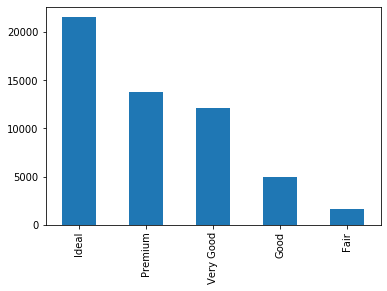

In [17]:
df['cut'].value_counts().plot(kind='bar')